In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset
filename = 'advertising.csv'
df = pd.read_csv(filename)

# Set predictors and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# ----- GRID SEARCH -----
# Define hyperparameter grid
param_grid = {'alpha': np.logspace(-3, 3, 50)}

# Initialize GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_alpha_grid = grid_search.best_params_['alpha']
best_cv_score_grid = -grid_search.best_score_

# Predict on test set
y_pred_grid = grid_search.predict(X_test)
test_mse_grid = mean_squared_error(y_test, y_pred_grid)

print("----- GRID SEARCH RESULTS -----")
print(f"Best alpha: {best_alpha_grid:.4f}")
print(f"Best CV MSE: {best_cv_score_grid:.3f}")
print(f"Test MSE: {test_mse_grid:.3f}")

----- GRID SEARCH RESULTS -----
Best alpha: 0.0010
Best CV MSE: 2.605
Test MSE: 4.402


In [6]:
# ----- RANDOMIZED SEARCH -----
# Define hyperparameter distribution
param_dist = {'alpha': np.logspace(-3, 3, 100)}  # can be treated as discrete choices

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(Ridge(), param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=0)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
best_alpha_random = random_search.best_params_['alpha']
best_cv_score_random = -random_search.best_score_

# Predict on test set
y_pred_random = random_search.predict(X_test)
test_mse_random = mean_squared_error(y_test, y_pred_random)

print("----- RANDOMIZED SEARCH RESULTS -----")
print(f"Best alpha: {best_alpha_random:.4f}")
print(f"Best CV MSE: {best_cv_score_random:.3f}")
print(f"Test MSE: {test_mse_random:.3f}")

----- RANDOMIZED SEARCH RESULTS -----
Best alpha: 0.0013
Best CV MSE: 2.605
Test MSE: 4.402


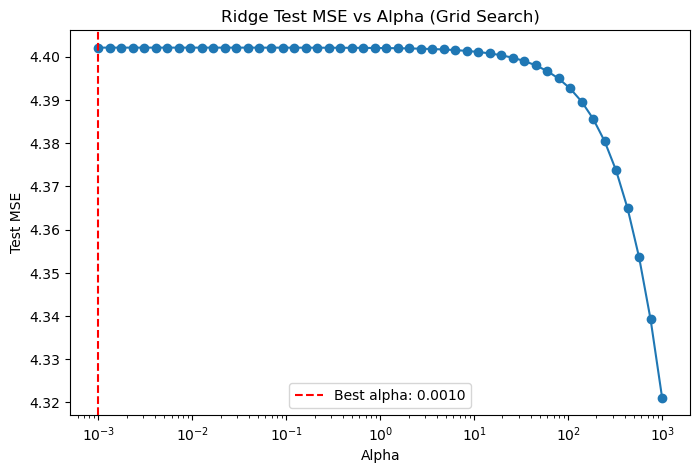

In [7]:
# Plot alpha vs test MSE from grid search
alphas = param_grid['alpha']
test_mses = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    test_mses.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(alphas, test_mses, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Test MSE')
plt.title('Ridge Test MSE vs Alpha (Grid Search)')
plt.axvline(best_alpha_grid, color='red', linestyle='--', label=f'Best alpha: {best_alpha_grid:.4f}')
plt.legend()
plt.show()